####     The City University of New York School of Professional Studies (CUNY-SPS)
####     Web Analytics DATA 620

##       Final Project: Using Sentiment Analysis to reduce interview stress on Job Seekers


#####    Alexis Mekueko


Github Link –> https://github.com/asmozo24/Data620_Final_Project_Proposal
    

#### Research Questions

How can we use sentiment analysis to help job seekers to better understand job description?

Bonuses

#### Sentiment Analysis
Germany v Brazil | 2002 FIFA World Cup Final - https://www.youtube.com/fifa
2022 CUNY SPS Commencement Ceremony - https://www.youtube.com/user/CUNYSPS
    


In [270]:
#!pip3 install newspaper
#!pip3 install newspaper3k
#!python -m pip install --upgrade pip
#!pip3 install --upgrade ginsim
#!pip install gensim
#!pip3 install pyreadline
#!pip3 install summarization
#!pip3 install gensim==3.6.0 
#3.6.0
#!pip3 install wordcloud
#!pip3 install sumy
#Tokenization: Tokenization is the process of splitting the sentences into even smaller parts called 'tokens'.

In [276]:
import sys
import logging
import pandas as pd
import numpy as np
import seaborn as sns
#import readline
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from gensim.parsing.preprocessing import remove_stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#The Gensim library is another extremely useful library for removing stop words from a string in Python
from nltk.text import Text
import sumy
from newspaper import Article
from newspaper import Config

import requests
import json
from bs4 import BeautifulSoup
from urllib.request import urlopen

from nltk.corpus import (
    genesis,
    gutenberg,
    inaugural,
    nps_chat,
    treebank,
    webtext,
    wordnet,
    stopwords
)

#from nltk.corpus import stopwords 
from nltk.text import Text
import string
#from gensim.summarization.summarizer import summarize
from collections.abc import Mapping
#from gensim.summarization import keywords # noqa
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.nlp.tokenizers import Tokenizer
import collections
from collections import Counter #
from wordcloud import WordCloud
import re #removing square brackets
import nltk
import string
from nltk.util import bigrams
from nltk.corpus import names
import random
#from collections import Mapping, defaultdict
#from .dictionary import Dictionary
#from gensim import parsing, corpora, matutils, interfaces, models, similarities, summarization, utils 
#https://github.com/nltk/nltk/blob/develop/nltk/book.py

### Obtaining Data

Initially, we were interested in just about any Job descriptions. However, it appears that not all jobs are the same. 
Not all jobs aren't the same makes it more complex for the project. Thus, we want to only focus on data scientist/analyst jobs.
By selecting only selecting jobs labeled as data scientist/analyst, we will eliminate a lot of ambiguity. 

The data used on this project are job descriptions from companies jobs sites. Popular job sites such as indeed.com,
monster.com and linkedIn.com are websites where other companies come to post their jobs. So, the first job for job seekers 
who like these popular job sites is to find the company who has the job and go to that company website. Occasionally, some 
companies will not post the jobs on their website. This event is rare and we will not consider it. 
Another situation is where these popular jobs sites don't list the hiring company. This event is possible and probably means that
This is likely to be a contractor company looking to hire a candidate on behalf their client. Again, we will not account for this
event. 

For testing purpose, here are few links:

https://jobs.intel.com/ShowJob/Id/3538757/Data-Scientist
https://jobs.intel.com/ShowJob/Id/2586261/Data-Scientist-Student
https://jobs.intel.com/ShowJob/Id/3277999/Experienced-Data-Scientist   
https://jobs.intel.com/ShowJob/Id/3448351/Data-Analyst-(Graduate-Student)
https://jobs.nike.com/job/00578018?apstr=src%3DJB-11022
https://salesforce.wd1.myworkdayjobs.com/en-US/External_Career_Site/job/Texas---Dallas/Data-Analyst_JR159811?source=LinkedIn_Jobs

In [3]:
with open('job1_indeed.txt', encoding='utf-8') as f:
    text1 = f.read()
    #print(text1)

#text1 = open("job1_indeed.txt", "r",encoding='utf-8')
#print(text1.read())
#text1.close()

#### Web Scraping

The above file does print the text file, but this is based on the assumption user copied the job description and pasted onto 
notepad file. Job hunters often have to look at several job posts and select the ones that meet their interests. 
In this regard, would the job hunters look at 50 jobs and copy them all? There is an efficient way to do this-that is to
build a function that can do web-scraping. This will reduce the need to save the job description onto a .txt file. 
Job hunters will only need to input the link where the job is posted.

In [19]:
def webjob (url):
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
    config = Config()

    config.browser_user_agent = user_agent
    page = Article(url, config=config)

    page.download()
    page.parse()
    #print(page.text)
    page = page.text
    return page

url = "https://www.monster.com/job-openings/data-scientist-portland-or--bbfa2e4a-0e08-49b1-88f0-b2accf43991f?sid=08b4f740-d93d-4b3e-a2ec-e97a5d4c2774&jvo=m.undefined.sc.1&so=m.h.s&_ga=2.118601098.201329110.1661147961-2010158452.1659409496&hidesmr=1".strip()

#webjob(url)

#This code works but not so well.


In [111]:
#This function takes in link and return the content of the webpage.
def JobPost(url):
    # downloading the entire webpage
    page = Article(url)
    page.download()

    # parses the downloaded html
    page.parse()
    text = page.text
    text =text.replace('\n', ' ')
    return text   

url = 'https://jobs.intel.com/ShowJob/Id/3448351/Data-Analyst-(Graduate-Student) https://jobs.nike.com/job/00578018?apstr=src%3DJB-11022'.strip()
#.replace("\\r\\n"," ").replace("\\\'s","")
text1 = JobPost(url)
#text1 = text1.replace('\n', ' ')
with open('job.txt', "w", encoding='utf-8') as file:
    file.write(text1)
    #print(text1, file=f)
text1
#with open('job.txt', "r",encoding='utf-8') as file:
#    text = f.read()
    #print(text)
    

"Job ID: JR0227183 Job Category: Intern/Student Primary Location: Virtual, AZ US Other Locations: Job Type: Intern  Data Analyst (Graduate Student)  Intel is in the midst of an exciting transformation, with a vision to create and extend computing technology to connect and enrich the lives of every person on Earth; so join us and help us create the next generation of technologies that will shape the future for decades to come!  Internships are a unique opportunity to combine your studies with practical experience in system engineering of cutting edge enterprise technologies. You will gain a deep understanding of design, development, and integration of complex systems. During this internship you will get real-world experience with ownership of projects from day one, as well as the opportunity to develop a network of contacts for your future.  A Data Analyst is a professional who develops physical data models at the application system level based upon collects and analyzes data across the

#### Note: After running the webscraping function, it appears that some job sites have security forbiding pull request on their 
data. Therefore, the webscraping function returns error messages. Sometimes, the website has paginated search section like Indeed.com.
Moreover, there are many web contents suggesting a specific build function for accessing job sites like indeed.com, 
linkedIn.com and monster.com...these might need a special treatment.

In [67]:
#https://www.linkedin.com/jobs/view/3228035311/?eBP=JOB_SEARCH_ORGANIC&recommendedFlavor=IN_NETWORK&refId=2w0apYiDMBUMz6aKu5BDew%3D%3D&trackingId=Z54kVBoiU5v9ugdjFLZ0PA%3D%3D&trk=flagship3_search_srp_jobs
#https://jobs.intel.com/ShowJob/Id/3538757/Data-Scientist
#https://jobs.intel.com/ShowJob/Id/2586261/Data-Scientist-Student
#https://jobs.intel.com/ShowJob/Id/3277999/Experienced-Data-Scientist   
#https://jobs.intel.com/ShowJob/Id/3448351/Data-Analyst-(Graduate-Student)
#https://salesforce.wd1.myworkdayjobs.com/en-US/External_Career_Site/job/Texas---Dallas/Data-Analyst_JR159811?source=LinkedIn_Jobs
#https://www.indeed.com/viewjob?jk=fa6188d6d1994802&q=Data+Scientist&l=Hillsboro%2C+OR&tk=1gb1up0jci42d800&from=web&advn=808876208185647&adid=383214416&ad=-6NYlbfkN0CpzDdaQkua3np5pkmj49lKioZwmwxQ-yx5plwbYmV_MzdTlwEdcbG5MhHYbOqGoMDPtzuvKZinIYdl_SEojLHLRbvlNJ_JfXRph6M0L7De2CP_YNrXiQ7eav6N6Ss8IpQvv2SfO4Zce7ETXbWGsu9SxA_7HR-iZnyfgK8lw4f93SE0cEJhIOlfKz66kCNZZXWTgXVluCJF4mSvoNBx3Qr0ztr6xPNo__bItGpWlyw1kHZd_uAuHDbXjsgvLz366hKqlPK4v8zowC-jz9-WJoK2Vp6_tKi3nDNPiwn7Xe9vl2PIMmAMRLzTgN5-scUIRBJXnOJFLaAxKtrYvjUj6W856CzP0OM5PvqWTlWMLBznLQ%3D%3D&sjdu=IyHYSXDh_4AN8NCrh509p0Agy6INApu5HuPQSCbYjTjBPllLSV_FoeKzvq1dxKHOYR4Hsl2jgafqmx1cBqW3ZbpylTLrA9EXxTBS1xmm_yUNGoOhyREYVrgMedfIqoCESIUFDN8xwcSeRBt_6em-Lg&acatk=1gb20pakikmfo802&pub=4a1b367933fd867b19b072952f68dceb&xkcb=SoCY-_M3ah1rzH2f8x0LbzkdCdPP&vjs=3

def webjob2(url):
    page = urlopen(url)
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")
    print(soup.get_text())
    #text1 = soup.get_text()
    #text1 = text1.replace('\n', ' ')
    #return text1

url = "https://jobs.intel.com/ShowJob/Id/3277999/Experienced-Data-Scientist".strip()

#webjob2(url)


### Scrubing Data


##### Cleaning the corpus

Now that we are able to webscraping, we can look into the text. A Job description is also text like any other text with
the difference that it describes a position an employer is looking to hire for. So, as to any other text, cleaning is required
for the corpus.

In [112]:

def cleaningCorpus (text):
    #len(text) #44764
    #print('Total Words: ', len(text))
    
    str(text).replace("\r"," ").replace("\\\'s","")
    re.sub('[^\s]*[0-9]+[^\s]*', "", text)
    re.sub('[^\s]*[\*]+[^\s]*', "", text)
    # split into words
    #tokens = word_tokenize(text3) #, language='english', preserve_line=False)
    tokens =  nltk.tokenize.word_tokenize(text)
    #print(tokens)
    #print('Total Tokens after removing all white space: ', len(tokens))
    
    #removing all tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha()]
    #print(words[:50])
    #len(words
    
    #removing stopword
    #Stop words are common words like ‘the’, ‘and’, ‘I’, etc
    stop_words = stopwords.words('english') # extracting english stopwords
    #print(stop_words)
    #print('\n')
    #print('Total stopwords to be removed: ', len(stop_words))
    stop_wordss = set(stop_words)
    words = [word for word in words if not word in stop_wordss]
    
    #print(words[:50])
    #print('Total Tokens after removing all white space, punctuation and stopwords: ', len(words))
    
    #stripping punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [word.translate(table) for word in words]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    #len(words)
    # convert to lower case, normalization 
    words = [word.lower() for word in words]
    words = [word for word in words if not word in stopwords.words()]
    #words = remove_stopwords(words)
    #print(wordss[:50])
    
    #Find Unique Words...Unique Words are distinct word that are not stopwords, puntuaction words
    #len(set(all_words))
    count = 0
    unique = []
    for word in words:
        if word not in unique:
            unique.append(word)
        count +=1
    #sort
    #unique.sort()
    #print
    #print(unique)
    #print('\n')
    #print('Total Unique words: ', count) #len(unique)
    #should unique words be removed?
    #words = unique.remove()
    
    return words

    



In [113]:
#text1 = remove_stopwords(text1)
cleaningCorpus(text1)


['job',
 'id',
 'job',
 'category',
 'primary',
 'location',
 'virtual',
 'locations',
 'job',
 'type',
 'intern',
 'data',
 'analyst',
 'graduate',
 'student',
 'intel',
 'midst',
 'exciting',
 'transformation',
 'vision',
 'create',
 'extend',
 'computing',
 'technology',
 'connect',
 'enrich',
 'lives',
 'person',
 'earth',
 'join',
 'create',
 'generation',
 'technologies',
 'shape',
 'future',
 'decades',
 'internships',
 'unique',
 'opportunity',
 'combine',
 'studies',
 'practical',
 'experience',
 'system',
 'engineering',
 'cutting',
 'edge',
 'enterprise',
 'technologies',
 'deep',
 'understanding',
 'design',
 'development',
 'integration',
 'complex',
 'systems',
 'internship',
 'experience',
 'ownership',
 'projects',
 'day',
 'opportunity',
 'develop',
 'network',
 'contacts',
 'future',
 'data',
 'analyst',
 'professional',
 'develops',
 'physical',
 'data',
 'models',
 'application',
 'system',
 'level',
 'based',
 'collects',
 'analyzes',
 'data',
 'business',
 'make',

###Exploring the data

In [115]:
#Text Summarization is like what the noum implies...reduce a whole text into a small pagraph that resumes everything or 
#give a brief message about the text. It can be done manually using techinique in English grammar. However, Natural Language 
#Processing (NLP) made it possible to automatically summarize a text with machine learning algorithm.
#There are 02 approach in summarizing a text. Extractive approaches and Abstractive approaches.

#Extractive Approaches
#TextRank...gensim.summarization
def summurize(text):
    content = text
    # remove the reference numbers
    re.sub(r'\[.+\]', '', content)
    #Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words,
    #normally aiming to remove inflectional endings only and to return the base or dictionary form of a word,
    #which is known as the lemma[8].
    # finds a list of 10 important keywords, usses lemmetatization instead of stemming
    k = keywords(content, words=10, lemmatize=True).split('\n')
    kwords = ', '.join(k)

    # computes summary and reduces size by 20%
    return(summarize(content, 0.1), kwords)

#summurize(text1)

#Some how gensim stopped working ...tried many versions and it seems to not working anymore ...will try another summarizer
#error ..cannot import name 'Mapping' from 'collections' (C:\Program Files\Python310\lib\collections\__init__.py)

In [116]:
#### Luhn...sumy
#Luhn Summarization algorithm’s approach is based on TF-IDF (Term Frequency-Inverse Document Frequency). 
#It is useful when very low frequent words as well as highly frequent words(stopwords) are both not significant[9].

# Creating the parser
parser=PlaintextParser.from_string(text1,Tokenizer('english'))
#  Creating the summarizer
luhn_summarizer=LuhnSummarizer()
luhn_summary=luhn_summarizer(parser.document,sentences_count=3)
# Printing the summary
for sentence in luhn_summary:
  print(sentence)

Job ID: JR0227183 Job Category: Intern/Student Primary Location: Virtual, AZ US Other Locations: Job Type: Intern  Data Analyst (Graduate Student)  Intel is in the midst of an exciting transformation, with a vision to create and extend computing technology to connect and enrich the lives of every person on Earth; so join us and help us create the next generation of technologies that will shape the future for decades to come!
A Data Analyst is a professional who develops physical data models at the application system level based upon collects and analyzes data across the business to make informed decisions through a solid integrated data architectural foundation to drive informed decisions.
Responsibilities include but not limited to:  Developing physical data models at the application system level in alignment with logical business data architecture.


#### This sounds good! 

### Text Analysis

What does it take to fully comprehend a job description?
Understanding what the company is looking for-that is the job responsabilities.
What does it take to do the job responsabilities? That is the requirements or qualifications:checking if your skills meet the quals
What does the company offer in compensation for doing the job? usually, this will include working environment, salary and perks. 
    

##### How many words compose the job description?

In [117]:
text2 = cleaningCorpus(text1)

#len(text2) #44764
print('Total Words: ', len(text2))

Total Words:  474


Talking about job description, Cassie Sanchez[4] said that best job descriptions have about 300 to 660 words totals. 


#### What are the top 10 words used to write the job description?

In [256]:
#wordFeq = nltk.FreqDist(text2)
#topWords = []
#for key, value in wordFreq.items():
#    topWords.append((key, value))
#Sorting by frequency
#topWords = sorted(topWords, key = lambda x:x[1], reverse = True)
#topWords[:20]


In [118]:
#topWords = (dict(nltk.FreqDist(text2)))
#topWords = sorted(topWords, key = lambda x:x[1], reverse = True)
#topWords[:20]
topWords = collections.Counter(text2)
topWords = pd.DataFrame(topWords.most_common(10),
                             columns=['words', 'count'])
topWords

,words,count
0,data,34
1,intel,8
2,enterprise,7
3,physical,6
4,business,6
5,information,6
6,design,5
7,systems,5
8,models,5
9,application,5


Frequency highlights the weight of the word in regard to the job description.
Job descriptions are meant to describe a job. Often, desciptive texts have significant words and these words would be dominants.
These words tell the story about the job. These are words to focus on. 

#### Plotting topwords

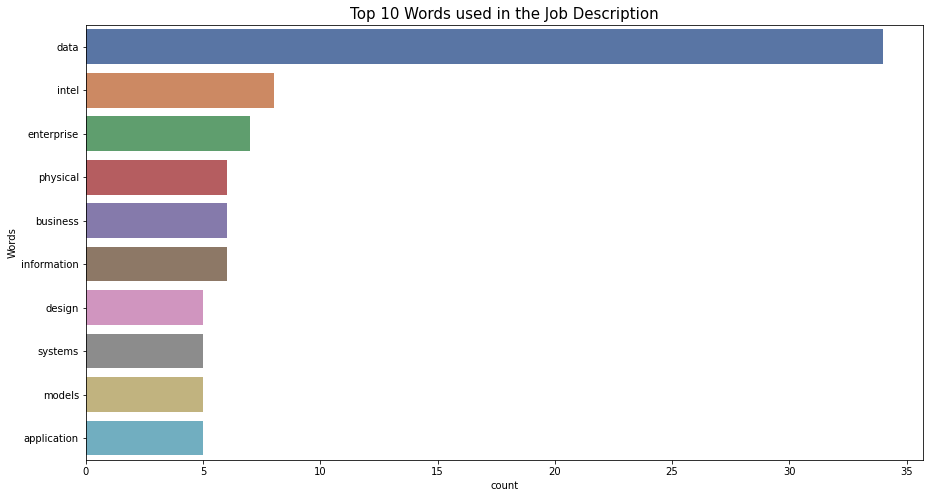

In [119]:
fig = plt.figure(figsize = (15, 8))
plt.title(label="Top 10 Words used in the Job Description",fontsize=15,color="black")
#plt.hist(topWords)

ax = sns.barplot(data = topWords, x = "count", y = "words", palette="deep")
#plt.barh(y=df.Group, width=df.Value);
ax.set(ylabel = "Words")
plt.xticks(rotation='horizontal')
#ax.invert_yaxis()
#plt.ylim(reversed(plt.ylim()))
plt.show()

#### Word Cloud
Word cloud is another way of visualizing the prominence of certain words within a text.

(-0.5, 799.5, 799.5, -0.5)

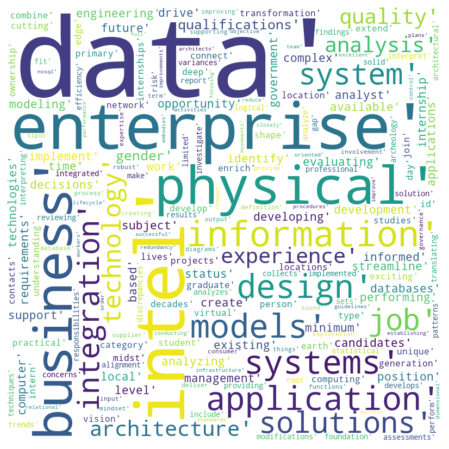

In [120]:
# Creating word_cloud with text as argument in .generate() method
plt.figure(figsize = (8, 8), facecolor = None)
wordCloud = WordCloud(width = 800, height = 800, min_font_size = 10, background_color = 'white').generate(str(text2))
# Display the generated Word Cloud
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
#plt.tight_layout(pad = 0)
#plt.show()

##### World cloud actually shows those top words.

### Extracting skills 
According to Ronald Van Loon on the article 'Top 6 Data Scientist Skills Required in 2022' [10], the skills required to become 
a data scientist are techinical and non-technical. 
Technical Skills:
Statistical analysis and computing
Machine Learning
Artificial intelligence
Deep Learning
Processing large data sets
Data Visualization
Data Wrangling
database
Mathematics
Probability
Programming (Python,Julia, R, Perl, C/C++, SQL,TensorFlow , and Java)
Analytical tools (Azure, Aws, cloud, SAS, excel, tableau, power BI, Hadoop, Spark, Hive, Pig, and R)
Statistics
Big Data


Non-technical skills[12]:

ownership
accumen
self-motivated
motivated
multitasking
probelm solver
problem solving
details oriented
data savy
teamwork
organised
awareness
team player
adapt
adaptibily
rapid
storytelling
curiosity
critical thinking
attention to details
Strong verbal and written communication skills



In [230]:
dict_skills = ["statistical","statistical", "analysis", "computing","ai" ,"machine", "machine learning","artificial intelligence","deep learning",
               "data","visualization","Wrangling","database", "databases","server", "mathematics","probability","programming","analytics",
               "python","julia","r","r programming","perl","c", "c++","sql","tensorFlow","java", "analytical",
               "azure","aws","cloud", "nosql","sas","excel","tableau","power bi","hadoop","spark","hive","pig","statistics","big data"]

soft_skillss = ["ownership","accumen","self-motivated","motivated","seft","multitasking","probelm solver", "solver","problem",
               "problem solving","solving","details oriented", "details", "oriented", "savy", "teamwork","organised",
               "organizing","motivating", "planning","awareness", "team player", "player", "team", " management","adapt",
               "adapting", "adaptibily", "rapid", "storytelling", "curiosity","critical thinking", "critial", "thinking",
               "attention to details","attention","verbal", "written","communication", "accountable", "respect","remote",
               "excellent", "inclusion", "commitment","management", "commitments", "expert", "expertise", "improvement",
                "focused", "focusing", "managing", "improving"]

def jobSkills(text, dict_skills):
    for word in text: 
        word = word.strip() 
        word = word.lower() 
        readLine = word.split()
        for i in text: 
            if i in dict_skills:
                dict_skills[i] = dict_skills[i]+1
            else:
                dict_skills[i] = 1

 
    file.close() 
    print("Count of: ")
    for k in list(dict_skills.keys()): 
        print("{} is {}".format(k,dict_skills[k]))
    

#jobSkills(str(text1), dict_skills)
# Something is missing here

''''
def jobSkills(text, dict_skills):
    wordcount=0
    for line in text.splitlines():
        #print(line)
        line = line.strip()
        line = line.lower()
        words = line.split(" ")
        for word in words:
            if word in dict_skills:
                wordcount += 1
                print(word)
    print(f"I found {wordcount} words")
    
    
#jobSkills(str(text2), dict_skills)
#text2

def jobSkills(file, dict):
    try:
        file = open(file, "r")
        read_file = file.readlines()
        file.close()
        print("The required skills are:\n")            
        for word in dict:
            words = word.lower()
            count = 0
            for line in read_file:
                line = line.split()
                for word_i in line:
                    line1 = word_i.lower()
                    line1 = line1.strip("!#$%^&*(()-_+=")
                #with open('skills.txt', "w", encoding='utf-8') as f:    
                    if words == line1:
                        count +=1
                        print(words, file = f)
            #print(words, ":", count)
    except fileExistsError:
        print("File does not exist")

''''

In [204]:
[11]
def jobSkills(file, dict):
    skills ='skills.txt'
    with open(file, 'r') as file, open(skills, 'w') as f:
        #file = open(file, "r")
        read_file = file.readlines()
        #file.close()
    try:
        print("The required skills are:\n")            
        for word in dict:
            words = word.lower()
            count = 0
            for line in read_file:
                line = line.split()
                for word_i in line:
                    line1 = word_i.lower()
                    line1 = line1.strip("!#$%^&*(()-_+=")
                #with open('skills.txt', "w", encoding='utf-8') as f:    
                    if words == line1:
                        count +=1
                        print(words, file = f)
            #print(words, ":", count)
    except fileExistsError:
        print("File does not exist")

        
#result = jobSkills("job.txt", dict_skills)
#with open('skills.txt', "w", encoding='utf-8') as file:
#    file.write(jobSkills("job.txt", dict_skills))
    #print(text1, file=f)
with open("skills.txt", 'r') as reader:
        skills = reader.read()
skills =cleaningCorpus(skills)
skills = collections.Counter(skills)
skills = pd.DataFrame(skills.most_common(10),
                             columns=['Technical Skills', 'count'])
skills
#sorting = result.key()
#sorting.sort()
#for item in sorting:
#    print(item, result[item])

,skills,count
0,data,31
1,analysis,3
2,statistical,1
3,computing,1
4,database,1
5,analytics,1


### Extracting Non-Technical Skills

In [253]:
def jobSkills(file, dict):
    oldstderr = sys.stderr
    sys.stderr = open("soft_skills.txt", "w", encoding='utf-8')
    with open(file, 'r') as file:
        #file = open(file, "r")
        read_file = file.readlines()
        #file.close()
    try:
        #print("The required Soft skills are:\n")            
        for word in dict:
            words = word.lower()
            count = 0
            for line in read_file:
                line = line.split()
                for word_i in line:
                    line1 = word_i.lower()
                    line1 = line1.strip("!#$%^&*(()-_+=")
                #with open('skills.txt', "w", encoding='utf-8') as f:    
                    if words == line1:
                        count +=1
                        #original_stdout = sys.stdout # Save a reference to the original standard output
                        #sys.stdout = sys.stderr # Redirect the standard output to the standard error.
                        print(words, file=sys.stderr) 
            #print(words, ":", count)
    except fileExistsError:
        print("File does not exist")
    sys.stderr = oldstderr

jobSkills("job.txt", soft_skillss)
    
#soft_skills ='soft_skills.txt'
#with open(soft_skills, 'w', encoding='utf-8') as fw:
#    fw.write()
    #print(jobSkills("job.txt", soft_skillss), file = fw)
            
            
#with open('skills.txt', "w", encoding='utf-8') as file:
#    file.write(jobSkills("job.txt", dict_skills))
    #print(text1, file=f)
with open("soft_skills.txt", 'r') as reader:
        soft_skills = reader.read()
soft_skills =cleaningCorpus(soft_skills)
soft_skills = collections.Counter(soft_skills)
soft_skills = pd.DataFrame(soft_skills.most_common(10),
                             columns=['Soft Skills', 'Count'])
soft_skills

,Soft Skills,Count
0,ownership,1
1,team,1
2,accountable,1
3,respect,1
4,excellent,1
5,inclusion,1
6,commitments,1
7,expertise,1
8,focusing,1
9,improving,1


### Extracting Education and Experience Requirement


In [262]:
#number of years of experience
#Bachelor degree in Statistics, Business, Mathematics, Computer Science, Engineering and/or related field.
#Data and Analytics, data science
#Master
#PhD
text = "job.txt"
def my_function(text):


  with open(text,'r') as f, open('output.txt','w') as fw:
      text = f.read()
      result_string = ''

      words = ["Bachelor", "Master", "PhD", "education", "salary", "years", "Salary", "$"]
      text2 = text.split(".")
      for itemIndex in range(len(text2)):
          for word in words:
              if word in text2[itemIndex]:
                  if text2[itemIndex][0] ==' ':
                      print(text2[itemIndex][1:])
                      result_string += text2[itemIndex][1:]+'. '
                      break
                  else:
                      print(text2[itemIndex])
                      result_string += text2[itemIndex]
                      break
      print(result_string)
      fw.write(result_string)

my_function(text)


   Minimum Qualifications:  Candidate must be currently pursuing a Master's degree in Computer Science, Computer Engineering, Data and Analytics or any other related field  â€‹  This position is not eligible for Intel immigration sponsorship
 Annual Salary Range for jobs which could be performed in US, Colorado:  $52,000
00-$147,000
   Minimum Qualifications:  Candidate must be currently pursuing a Master's degree in Computer Science, Computer Engineering, Data and Analytics or any other related field  â€‹  This position is not eligible for Intel immigration sponsorship.  Annual Salary Range for jobs which could be performed in US, Colorado:  $52,000. 00-$147,000


### Extracting Benefits and Perks

In [267]:
benefits_list = ["fitness", "wellness", "transportation","gift", "free", "tuition", "birthdays" , "medical", "gym",
                "pension", "bonus","bonuses", "vacation", "reimbursement","snack", "coffee","freebies", "stipends",
                "stipend", "club", "discount", "discounts", "stock"]



def jobSkills(file, dict):
    oldstderr = sys.stderr
    sys.stderr = open("benefits.txt", "w", encoding='utf-8')
    with open(file, 'r') as file:
        #file = open(file, "r")
        read_file = file.readlines()
        #file.close()
    try:
        #print("The required Soft skills are:\n")            
        for word in dict:
            words = word.lower()
            count = 0
            for line in read_file:
                line = line.split()
                for word_i in line:
                    line1 = word_i.lower()
                    line1 = line1.strip("!#$%^&*(()-_+=")
                #with open('skills.txt', "w", encoding='utf-8') as f:    
                    if words == line1:
                        count +=1
                        #original_stdout = sys.stdout # Save a reference to the original standard output
                        #sys.stdout = sys.stderr # Redirect the standard output to the standard error.
                        print(words, file=sys.stderr) 
            #print(words, ":", count)
    except fileExistsError:
        print("File does not exist")
    sys.stderr = oldstderr

jobSkills("job.txt", benefits_list)
    
#soft_skills ='soft_skills.txt'
#with open(soft_skills, 'w', encoding='utf-8') as fw:
#    fw.write()
    #print(jobSkills("job.txt", soft_skillss), file = fw)
            
            
#with open('skills.txt', "w", encoding='utf-8') as file:
#    file.write(jobSkills("job.txt", dict_skills))
    #print(text1, file=f)
with open("benefits.txt", 'r') as reader:
        benefits = reader.read()
benefits =cleaningCorpus(benefits)
benefits = collections.Counter(benefits)
benefits = pd.DataFrame(benefits.most_common(10),
                             columns=['Employee Benefits', 'Count'])
benefits

,Employee Benefits,Count
0,medical,1


## Conclusion

This project was about applying NLP, sentiment analysis on a job description to help job hunters to better understand the role 
before applying. NLP can be applied to just about any text file. In order to do this, we needed to access the job description. 
This can be done manually with saving the job description on a .txt file or automated pipeline through webscraping.
Webscraping is better since it reduces the time necessary for manipulating data around. However, not all job sites are the same.
Some job sites like indeed.com, linkedIn.com and monster.com require a special care. We succeeded in webscraping other 
job sites for companies like Nike and Intel Corporation. The analysis of the corpus (job description) revealed some interesting
information. This analysis was performed on specific job such data science, data analyst, business analyst, etc. We discovered
complexity of text analysis. Within the same job profile, some job description might be rendered slightly different. 
Maybe because the hiring manager/recruter wrote the job description to his/her own taste. The challenge is that there is no
standard format for job description and developers also add different kind of layout when designing website.
Nonetheless, there is a potential to go further with the approach used on this project to make an application that upon 
pasting a link (job website), the users/job seekers would be able to different aspects of the job such as:

-Job responsibilities (what the job entails)
-skills, education and experience required
-Employee benefits

This should enable the job seeker to comprehend the job description and quickly makes a decision whether to apply or not.
In a case of job seeker decides to apply, he/she will be applying with confidence. 



## Bonuses

### Analysis of the 2022 CUNY SPS Commencement Ceremony | CUNY School of Professional Studies speech

I recently attended the graduation ceremony for the CUNY-SPS class of 2022. I wonder what the result of such of eloquant speech
will give. I am going to use a rule-based approah. 

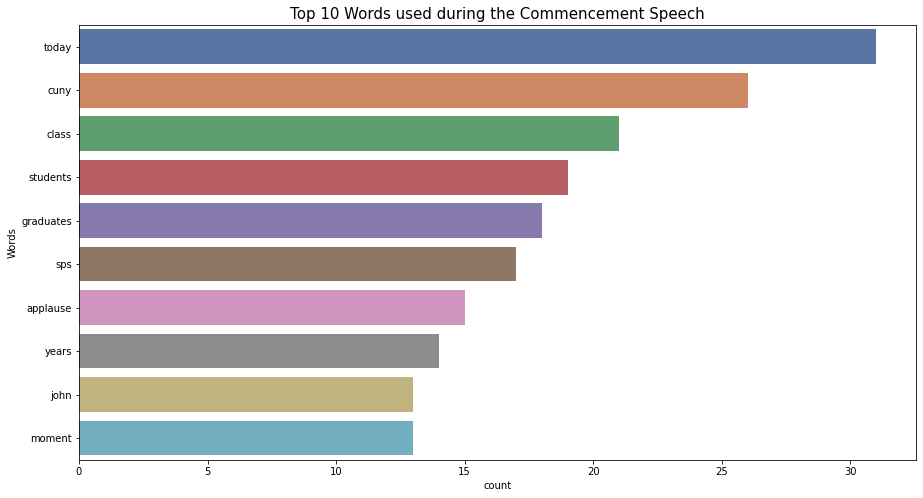

In [275]:
with open("commencement_ceremony_cuny_sps.txt", 'r') as reader:
        speech = reader.read()
speech1 = cleaningCorpus(speech)

topWords = collections.Counter(speech1)
topWords = pd.DataFrame(topWords.most_common(10),
                             columns=['words', 'count'])

fig = plt.figure(figsize = (15, 8))
plt.title(label="Top 10 Words used during the Commencement Speech",fontsize=15,color="black")
#plt.hist(topWords)

ax = sns.barplot(data = topWords, x = "count", y = "words", palette="deep")
#plt.barh(y=df.Group, width=df.Value);
ax.set(ylabel = "Words")
plt.xticks(rotation='horizontal')
#ax.invert_yaxis()
#plt.ylim(reversed(plt.ylim()))
plt.show()

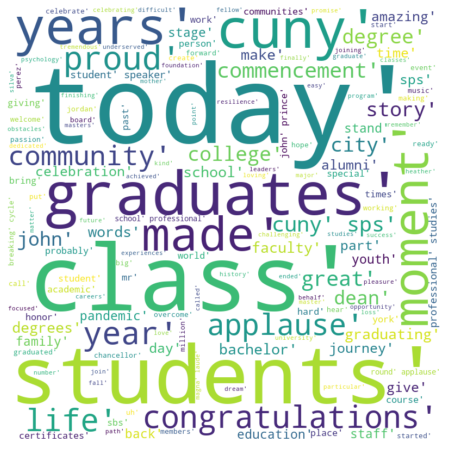

In [273]:

# Creating word_cloud with text as argument in .generate() method
plt.figure(figsize = (8, 8), facecolor = None)
wordCloud = WordCloud(width = 800, height = 800, min_font_size = 10, background_color = 'white').generate(str(speech1))
# Display the generated Word Cloud
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.show()

In [ ]:
So, congratulations students of CUNY, today you made it!


In [280]:
def sentiment_speech(speech):
    score = SentimentIntensityAnalyzer().polarity_scores(speech)
    positive = score['pos']
    negative = score['neg']
    if positive > negative:
        print("This speech has a positive sentiment")
    elif negative > positive:
        print("This speech has a negative sentiment")
    else:
        print("The speech has a neutral sentiment")
    
sentiment_speech(str(speech1))
    

The speech has a neutral sentiment


In [ ]:
Really!!!

### Analysis of Germany v Brazil 2002 FIFA World Cup Final 

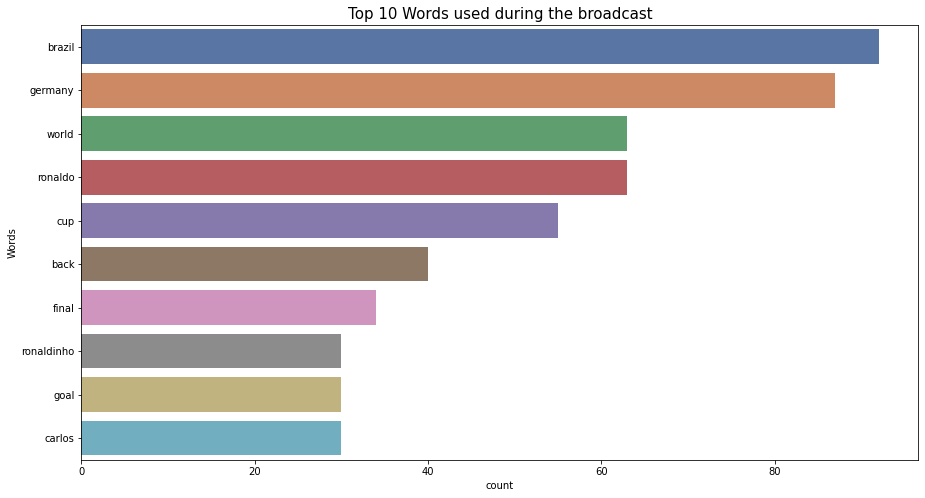

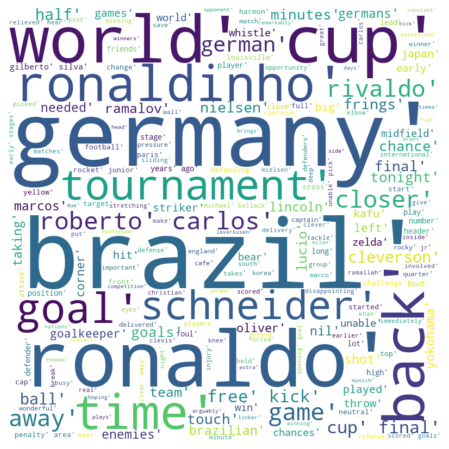

In [309]:
with open("fifa2002_worldcup_final.txt", 'r') as reader:
        speech = reader.read()
        
def sentiment_plot(speech):

    speech1 = cleaningCorpus(speech)

    topWords = collections.Counter(speech1)
    topWords = pd.DataFrame(topWords.most_common(10),
                                 columns=['words', 'count'])

    fig = plt.figure(figsize = (15, 8))
    plt.title(label="Top 10 Words used during the broadcast",fontsize=15,color="black")
    #plt.hist(topWords)

    ax = sns.barplot(data = topWords, x = "count", y = "words", palette="deep")
    #plt.barh(y=df.Group, width=df.Value);
    ax.set(ylabel = "Words")
    plt.xticks(rotation='horizontal')
    #ax.invert_yaxis()
    #plt.ylim(reversed(plt.ylim()))
    plt.show()

    # Creating word_cloud with text as argument in .generate() method
    plt.figure(figsize = (8, 8), facecolor = None)
    wordCloud = WordCloud(width = 800, height = 800, min_font_size = 10, background_color = 'white').generate(str(speech1))
    # Display the generated Word Cloud
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    #plt.tight_layout(pad = 0)
    plt.show()

sentiment_plot(speech)

In [310]:
sentiment_speech(str(speech1))

The speech has a neutral sentiment


In [ ]:
## References:

1-https://realpython.com/python-web-scraping-practical-introduction/
2-https://stackoverflow.com/questions/71497026/how-to-extract-job-description-web-scrapping-from-the-site-using-python
3-https://github.com/thesohelshaikh/text-summarizer
4-https://textio.com/blog/how-to-write-a-job-description-in-2020-best-practices-from-half-a-billion-job-postings/28706464272#:~:text=Hit%20the%20sweet%20spot%20for%20word%20count&text=Right%20now%2C%20the%20job%20descriptions,a%2Dhalf%20pages%20in%20length.
5-https://stackabuse.com/removing-stop-words-from-strings-in-python/
6-https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
7-https://www.geeksforgeeks.org/generating-word-cloud-python/
8-https://www.google.com/search?q=lemmetatization&oq=lemmetatization&aqs=chrome..69i57j0i13i131i433j0i13l8.535j0j7&sourceid=chrome&ie=UTF-8
9-https://www.machinelearningplus.com/nlp/text-summarization-approaches-nlp-example/
10-https://www.simplilearn.com/what-skills-do-i-need-to-become-a-data-scientist-article
11-https://www.youtube.com/watch?v=LvEpMW-5RXk
12-https://www.simplilearn.com/soft-skills-for-data-scientist-article
13-https://www.scraperapi.com/blog/web-scraping-python/
14-https://www.youtube.com/watch?v=uufgyqgXYkc
